# Basic Classification: Classify clothing

This is a neural network model to classify images of clothing, like shirts, shoes and sneakers using the Fashion MNIST dataset

In [3]:
# Imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [5]:
# Importing and loading the data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(test_labels)

10000

In [10]:
len(train_labels)

60000

In [11]:
test_images.shape

(10000, 28, 28)

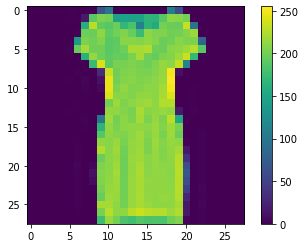

In [14]:
#Preprocess data

plt.figure()
plt.imshow(train_images[20])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
# Rescale the values to a range of 0 to 1

train_images = train_images / 255.0
test_images = test_images / 255.0

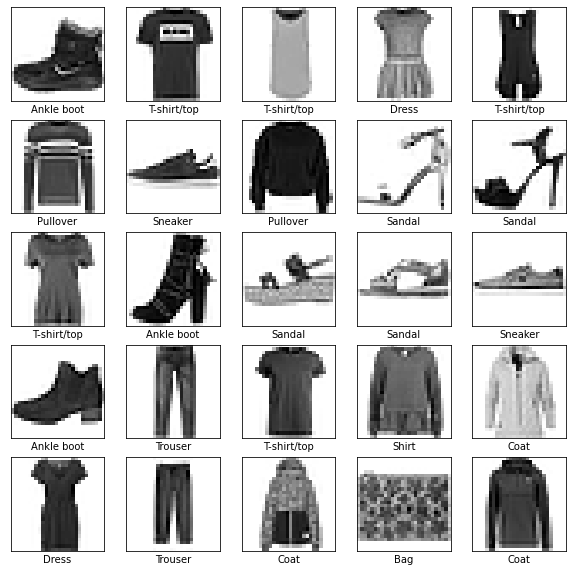

In [16]:
# Verify the iput data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the model

In [17]:
# Setting up layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [19]:
# Compiling the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
# Training the model

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4976 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3743 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3123 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2813 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2462 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

This model reaches an accuracy of 91%

In [23]:
# Compare how the model performs on the test dataset

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 1s - loss: 0.3233 - accuracy: 0.8860

Test Accuracy: 0.8859999775886536


## Make predictions

In [24]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

In [26]:
predictions[0]

array([4.1309750e-07, 1.2405801e-11, 2.8387809e-10, 5.3440935e-15,
       8.6129257e-11, 2.3538251e-03, 1.6055548e-08, 6.1118067e-03,
       8.0016865e-10, 9.9153394e-01], dtype=float32)

In [30]:
np.argmax(predictions[10])

4

In [31]:
test_labels[10]

4

In [32]:
#Full set of 0 class predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

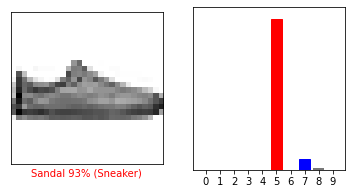

In [36]:
#Verifying predictions
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

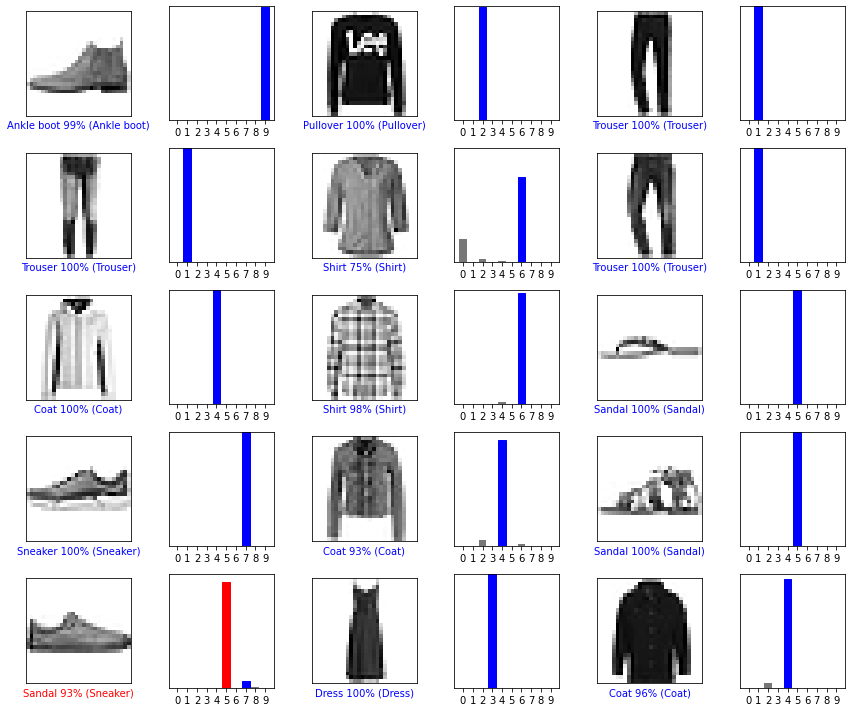

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Using the trained model

We will use the trained model to make predictions about a single image.

In [38]:
img = test_images[12]
print(img.shape)

(28, 28)


In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.4003999e-06 3.6091581e-09 1.0429610e-08 1.6001985e-07 5.5940721e-08
  9.2775637e-01 2.4144450e-07 6.3726991e-02 8.5108429e-03 3.9234942e-06]]


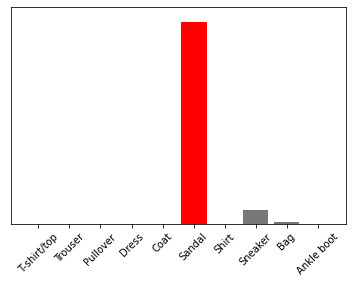

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
np.argmax(predictions_single[0])

5